In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ipywidgets import interact
# import matplotlib.animation as animation

In [87]:
SIM_GEN_LOC = "../gen_dat/passenger_route.csv"


In [97]:
sim_gen_loc_df = pd.read_csv(SIM_GEN_LOC, 
                              index_col = 0, 
                              header=0)
sim_gen_loc_df

,s,d,day_of_flight,mon,prebooked_days_norm,prebooked_days,day_of_booking,is_passenger
0,MAH,DUS,1,0,0.074984,27.0,339.0,1.0
1,SVQ,RKE,1,0,0.041357,15.0,351.0,0.0
2,MAD,MUC,1,0,0.270588,99.0,267.0,1.0
3,TXL,HEL,1,0,0.010159,4.0,362.0,0.0
4,BOJ,HAM,1,0,0.028937,11.0,355.0,0.0
...,...,...,...,...,...,...,...,...
662322,MUC,HAM,365,12,0.410048,150.0,580.0,0.0
662323,NCE,MLA,365,12,0.003416,1.0,729.0,0.0
662324,LPA,PMI,365,12,0.189078,69.0,661.0,1.0
662325,ORY,FUE,365,12,0.021187,8.0,722.0,0.0


<AxesSubplot:xlabel='s,mon'>

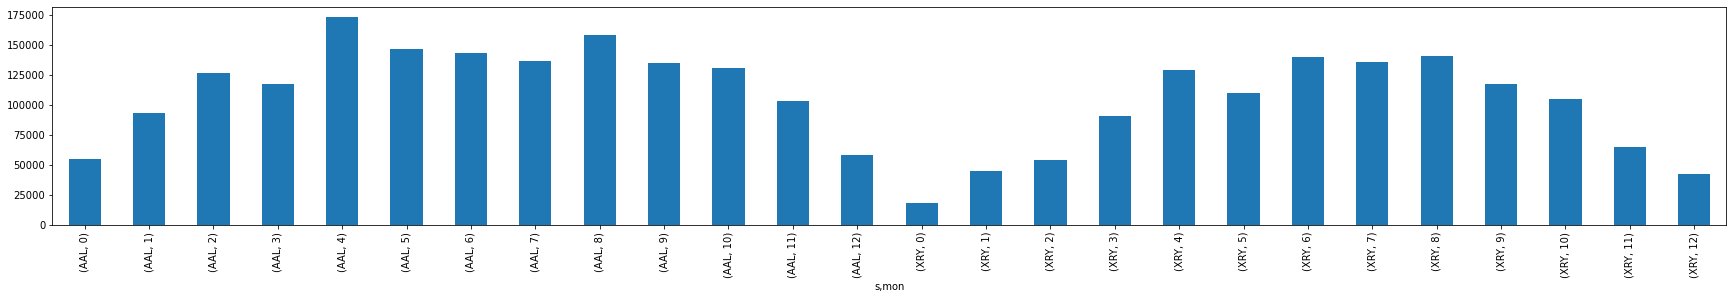

In [8]:
(sim_gen_loc_df.groupby(["s","mon"]).count()*1000).loc[[("AAL"),("XRY")]]["d"].plot(figsize=(30,4), kind='bar')

<AxesSubplot:ylabel='Frequency'>

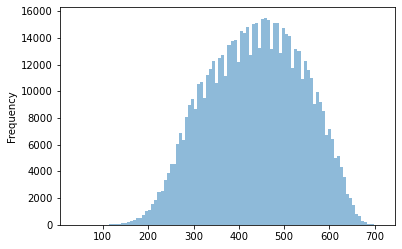

In [71]:
sim_gen_loc_df.assign(x=lambda row: 365 + row.day - round(row.days_before_booking_norm * 365))["x"].plot.hist(bins=100, alpha=0.5)

# sim_gen_loc_df.groupby('mon').case_status.value_counts().unstack(0).plot.barh()


# df = sim_gen_loc_df.set_index(['mon'], inplace=True)
# df.groupby('s')['days_before_booking_norm'].plot(legend=True)

<AxesSubplot:ylabel='Frequency'>

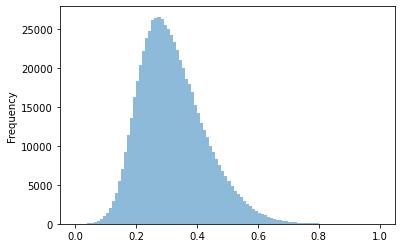

In [43]:
sim_gen_loc_df["days_before_booking_norm"].plot.hist(bins=100, alpha=0.5)

In [34]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]

lifespan = [2, 8, 70, 1.5, 25, 12, 28]

index = ['snail', 'pig', 'elephant',

         'rabbit', 'giraffe', 'coyote', 'horse']

df = pd.DataFrame({'speed': speed,

                   'lifespan': lifespan}, index=index)
df

# ax = df.plot.bar(rot=0)

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


In [72]:
# DAYS = 365
# airport_code = "LEI"
# mul_fact = 1000

# path = lambda day: '../gen_dat/' + str(day) + "_new.csv";

# data = []
# for day in range(DAYS):
#     df = pd.read_csv(path(day), index_col=0)
#     if airport_code in df['s'].unique(): 
#         row = [day,(df.groupby(["s","day"]).count()*mul_fact).loc[(airport_code)]["d"].values[0]]
#         data.append(row)

# df = pd.DataFrame(data, columns=['d','v'])

# month_list = []
# for month in range(12):
#     month_list.append(list(df[month*30:(month+1)*30].sum())[1])
    
# df_month = pd.DataFrame(month_list)
# df_month.plot(kind='bar',figsize=(35,4))

(array([1.0690e+03, 5.1500e+03, 1.0048e+04, 1.3180e+04, 1.4115e+04,
        1.4027e+04, 1.3587e+04, 1.2598e+04, 1.1741e+04, 1.0954e+04,
        1.0540e+04, 9.6490e+03, 9.1100e+03, 8.7800e+03, 8.3840e+03,
        7.9140e+03, 7.3900e+03, 7.1950e+03, 6.8690e+03, 6.6170e+03,
        6.3290e+03, 6.1430e+03, 5.9230e+03, 5.7190e+03, 5.7960e+03,
        5.4620e+03, 5.3380e+03, 5.0780e+03, 5.1330e+03, 4.9270e+03,
        4.7970e+03, 4.7020e+03, 4.7340e+03, 4.6870e+03, 4.5830e+03,
        4.5530e+03, 4.4140e+03, 4.4220e+03, 4.3250e+03, 4.2480e+03,
        4.2320e+03, 4.0540e+03, 4.0990e+03, 4.1230e+03, 4.1150e+03,
        4.1070e+03, 3.9980e+03, 4.0700e+03, 4.1280e+03, 4.0530e+03,
        4.1360e+03, 4.0240e+03, 3.9060e+03, 4.1400e+03, 4.0410e+03,
        4.1100e+03, 4.0510e+03, 3.9430e+03, 4.0110e+03, 4.0010e+03,
        4.0190e+03, 3.9730e+03, 4.0580e+03, 3.9270e+03, 4.0790e+03,
        4.0320e+03, 3.9710e+03, 4.0390e+03, 3.9170e+03, 3.8490e+03,
        4.0230e+03, 3.9680e+03, 3.9680e+03, 4.07

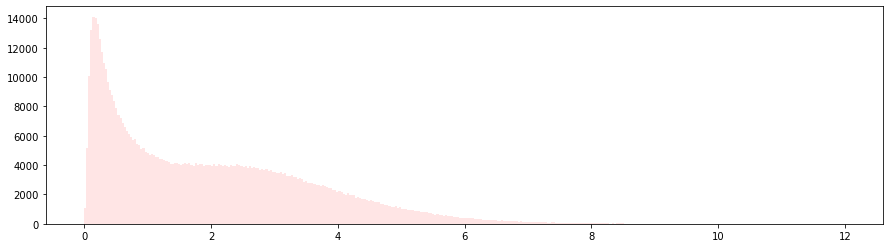

In [108]:
plt.figure(figsize=(15, 4))
plt.hist(sim_gen_loc_df['prebooked_days_norm']*12, 365, color='red', alpha=0.1)

In [82]:
normailed_value = 0.000123
day = 44
365 + day - normailed_value * 365

408.955105

In [91]:
sim_gen_loc_df.sort_values(by='day_of_booking').sort_values(by='days_before_booking')[:30]

,s,d,day,mon,days_before_booking_norm,days_before_booking,day_of_booking
63713,MAD,BRE,48,2,0.001081,0.0,413.0
100199,HAM,DUB,73,2,0.001102,0.0,438.0
610601,MUC,TER,330,11,0.000945,0.0,695.0
220232,TXL,NCE,140,5,0.001355,0.0,505.0
567077,LUX,DUB,301,10,0.000985,0.0,666.0
159250,DUB,MUC,108,4,0.000000,0.0,473.0
501573,VAR,MAD,268,9,0.000811,0.0,633.0
534367,ALC,CRL,285,9,0.000738,0.0,650.0
578055,MAD,LYS,308,10,0.000000,0.0,673.0
253304,ALC,TFN,156,5,0.000770,0.0,521.0


In [ ]:
SIM_GEN_LOC